(9344,)


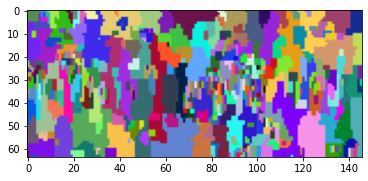

In [35]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=1024


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

connectivity = grid_to_graph(n_x=nx, n_y=ny)

n_clusters_=450

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((nx,ny))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im_hac)

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3
(9344,)


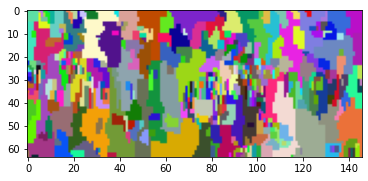

In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=512


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

connectivity = grid_to_graph(n_x=nx, n_y=ny)

n_clusters_=450

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((nx,ny))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im_hac)

KstestResult(statistic=0.11450778810789164, pvalue=1.3496561172274803e-05)


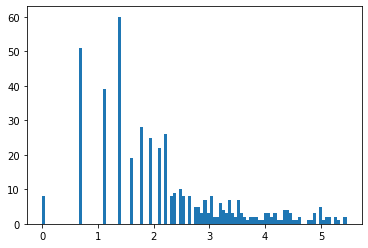

In [2]:
area=np.zeros(n_clusters_)
for i in range(n_clusters_):
    area[i]=np.where(labels==i)[0].shape[0]
plt.hist(np.log(area),bins=100)

from scipy import stats
x=np.log(area)
result=stats.kstest(x,  'norm',args=(x.mean(),x.std()))
print(result)

#stats.normaltest(np.log(area))
#stats.kstest(np.log(area),  'norm',N=200)

#print(stats.lognorm.cdf)
#stats.kstest(area,  stats.lognorm.cdf)



In [3]:
ns_clusters_=np.arange(50,950,25)

ks=np.zeros(ns_clusters_.shape)

for i in range(ns_clusters_.shape[0]):
    ward = cluster.AgglomerativeClustering(n_clusters=ns_clusters_[i], connectivity=connectivity, linkage='ward').fit(pca_features)
    labels = ward.labels_
    area=np.zeros(ns_clusters_[i])
    for j in range(ns_clusters_[i]):
        area[j]=np.where(labels==j)[0].shape[0]
    x=np.log(area)
    #result=stats.kstest(x,  'norm',args=(x.mean(),x.std()))
    result=stats.kstest(np.exp(x-x.mean()), stats.lognorm.cdf,args=(x.std(),))
    print(result)
    ks[i]=result[0]

KstestResult(statistic=0.1758638523754683, pvalue=0.0800259471009211)
KstestResult(statistic=0.13927024470763455, pvalue=0.09891345195542264)
KstestResult(statistic=0.11711884025258545, pvalue=0.11873950985067941)
KstestResult(statistic=0.12266902309603711, pvalue=0.04256158428681495)
KstestResult(statistic=0.10175722800737408, pvalue=0.08342743081965802)
KstestResult(statistic=0.10621881117268095, pvalue=0.03573455570341953)
KstestResult(statistic=0.11025274027575616, pvalue=0.014255090375411957)
KstestResult(statistic=0.10965227938708483, pvalue=0.008229793008526342)
KstestResult(statistic=0.10564646723580617, pvalue=0.006963868983876261)
KstestResult(statistic=0.09390962101589428, pvalue=0.014615417555479944)
KstestResult(statistic=0.09724075199560356, pvalue=0.006389724636797131)
KstestResult(statistic=0.10389645171071854, pvalue=0.001653538456875537)
KstestResult(statistic=0.0993228069926641, pvalue=0.001855545466450248)
KstestResult(statistic=0.10326637420589391, pvalue=0.0006185

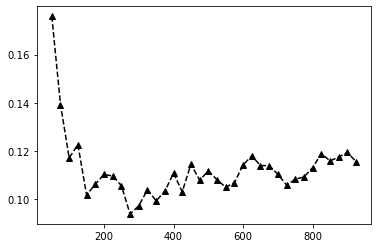

In [6]:
plt.plot(ns_clusters_,ks,'k^--')

(9344,)
KstestResult(statistic=0.15399957537378117, pvalue=0.1680299964568899)
KstestResult(statistic=0.15525547734977618, pvalue=0.04805624973930635)
KstestResult(statistic=0.11984532521068914, pvalue=0.10410007484371006)
KstestResult(statistic=0.09958808668875357, pvalue=0.1566254992888617)
KstestResult(statistic=0.1048068696427229, pvalue=0.06887687841063514)
KstestResult(statistic=0.09946665454488923, pvalue=0.05846518368513431)
KstestResult(statistic=0.12278994153907163, pvalue=0.0043672764720659426)
KstestResult(statistic=0.12579828959099104, pvalue=0.0014581313215391814)
KstestResult(statistic=0.11505359472861976, pvalue=0.0024389531226673617)
KstestResult(statistic=0.10508332884073818, pvalue=0.004251195140535009)
KstestResult(statistic=0.10024332426994564, pvalue=0.004462047835623166)
KstestResult(statistic=0.10088563557966568, pvalue=0.0024776612957025466)
KstestResult(statistic=0.09609181189258426, pvalue=0.002897727155929)
KstestResult(statistic=0.10514410925166978, pvalue=

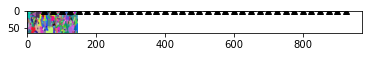

In [7]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA

n_pca=1024


pca = PCA(n_components=n_pca, svd_solver='randomized')

pca_features=pca.fit_transform(FA_spatial)#components_

#pca_features=pca.fit_transform(np.delete(FA_spatial,argmin,0))#components_

#pca_features=np.insert(pca_features,argmin,np.zeros(n_pca),0)

connectivity = grid_to_graph(n_x=nx, n_y=ny)

n_clusters_=450

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)

labels = ward.labels_
print(labels.shape)
grains=labels.reshape((nx,ny))
colors=np.random.uniform(size=(n_clusters_,3))
sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
sample_silhouette_values=sample_silhouette_values.reshape((64,146))

im_hac=np.zeros(tuple(list(grains.shape)+[3]))

for i in range(nx):
    for j in range(ny):
        #if sample_silhouette_values[i,j] > 0:
        im_hac[i,j]=colors[grains[i,j]]
        #else:
        #    im_hac[i,j]=colors[grains[i,j]]#np.array([1.,1.,1.])
plt.imshow(im_hac)
plt.clf()
ns_clusters_=np.arange(50,950,25)

ks=np.zeros(ns_clusters_.shape)

for i in range(ns_clusters_.shape[0]):
    ward = cluster.AgglomerativeClustering(n_clusters=ns_clusters_[i], connectivity=connectivity, linkage='ward').fit(pca_features)
    labels = ward.labels_
    area=np.zeros(ns_clusters_[i])
    for j in range(ns_clusters_[i]):
        area[j]=np.where(labels==j)[0].shape[0]
    x=np.log(area)
    #result=stats.kstest(x,  'norm',args=(x.mean(),x.std()))
    result=stats.kstest(np.exp(x-x.mean()), stats.lognorm.cdf,args=(x.std(),))
    print(result)
    ks[i]=result[0]
plt.plot(ns_clusters_,ks,'k^--')

(1.2591738957585552, 0.7834743872487443, 4.3546502964063105)

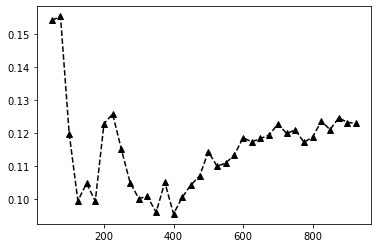

In [10]:
plt.clf()
plt.plot(ns_clusters_,ks,'k^--')

stats.lognorm.fit(area)

KstestResult(statistic=0.019603423623279492, pvalue=0.8368671197810613)


(array([  2.,   9.,  54., 133., 225., 268., 188.,  74.,  37.,  10.]),
 array([-3.406555741141339, -2.758750254686914, -2.110944768232489,
        -1.463139281778064, -0.81533379532364 , -0.167528308869215,
         0.48027717758521 ,  1.128082664039634,  1.77588815049406 ,
         2.423693636948485,  3.071499123402909]),
 <a list of 10 Patch objects>)

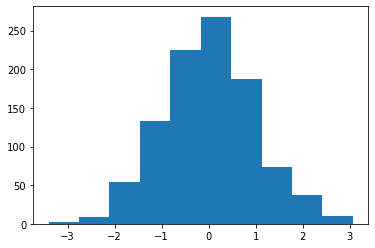

In [67]:
s=np.random.normal(size=1000)
result=stats.kstest(s,  stats.norm.cdf, args=(s.mean(),s.std()))
print(result)

plt.hist(s)

In [74]:
es=np.exp(s-s.mean())
result=stats.kstest(es,  stats.lognorm.cdf, args=(s.std(),))
print(result)

KstestResult(statistic=0.019603423623279492, pvalue=0.8368671197810613)
